#### **1단계: 환경 설정 및 데이터/모델 준비**

Colab 런타임은 **GPU**로 설정하는 것을 권장

In [2]:
!pip install --upgrade ultralytics tensorflow torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 113.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 117.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 44.1/112.6 GB disk)


In [3]:
from google.colab import drive
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import yaml
import os

# 구글 드라이브 마운트
# 학습 데이터 크기와 결과 유지를 위해 데이터셋을 구글 드라이브에 연결

drive.mount('/content/drive')
# 3. 데이터셋 경로 및 YAML 경로 변수 설정
# 이전에 다운로드하고 압축을 푼 데이터셋의 경로를 사용합니다.
DATASET_PATH = "/content/drive/MyDrive/hackerton/safe/HardHatDetector"
YAML_PATH = "/content/drive/MyDrive/hackerton/safe/HardHatDetector/data.yaml" # 경로를 수정한 YAML 파일

print("훈련을 위한 최종 data.yaml 파일을 생성합니다...")

# 우리가 원하는, 명확한 클래스 이름 리스트를 직접 정의합니다.
# Roboflow에서 export한 데이터셋의 클래스 순서와 동일해야 합니다.
# (예: Roboflow에서 0=helmet, 1=no-helmet 순서였다면 그대로 유지)
class_names = ['helmet', 'no-helmet']
num_classes = len(class_names)

# 최종 사용할 YAML 데이터 구성
custom_data_yaml = {
    'train': os.path.abspath(os.path.join(DATASET_PATH, 'train/images')),
    'val': os.path.abspath(os.path.join(DATASET_PATH, 'valid/images')),
    'test': os.path.abspath(os.path.join(DATASET_PATH, 'test/images')),
    'nc': num_classes,
    'names': class_names
}

# 최종 YAML 파일 경로
CUSTOM_YAML_PATH = '/content/drive/MyDrive/hackerton/safe/HardHatDetector/custom_data.yaml'

# 새로운 YAML 파일로 저장
with open(CUSTOM_YAML_PATH, 'w') as f:
    yaml.dump(custom_data_yaml, f)

print(f": {CUSTOM_YAML_PATH}")
print("--- final_helmet_data.yaml 내용 ---")
with open(CUSTOM_YAML_PATH, 'r') as f:
    print(f.read())
print("---------------------------------")

print(f"훈련에 사용될 YAML 파일 생성 완료: {CUSTOM_YAML_PATH}")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
훈련을 위한 최종 data.yaml 파일을 생성합니다...
: /content/drive/MyDrive/hackerton/safe/HardHatDetector/custom_data.yaml
--- final_helmet_data.yaml 내용 ---
names:
- helmet
- no-helmet
nc: 2
test: /content/drive/MyDrive/hackerton/safe/HardHatDetector/test/images
train: /content/drive/MyDrive/hackerton/safe/HardHatDetector/train/images
val: /content/drive/MyDrive/hackerton/safe/HardHatDetector/valid/images

---------------------------------
훈련에 사용될 YAML 파일 생성 완료: /content/drive/MyDrive/hackerton/safe/HardHatDetector/custom_data.yaml


#### **2단계: YOLO 모델 훈련**

이제 준비된 YAML 파일을 사용하여 모델 훈련을 시작합니다.

In [ ]:
# 데이터 증강과 세부 설정 적용
model = YOLO('/content/drive/MyDrive/hackerton/safe/HardHatDetector/ptModel/yolo11s.pt')
training_results = model.train(
    data=CUSTOM_YAML_PATH,
    epochs=50,
    patience=10,
    batch=16,
    imgsz=640,
    optimizer='AdamW',
    lr0=0.001,

    # ---  데이터 증강 옵션 ---
    # hsv_h=0.015,  # 색상(H) 변화 범위 (기본값: 0.015)
    # hsv_s=0.7,    # 채도(S) 변화 범위 (기본값: 0.7)
    # hsv_v=0.4,    # 명도(V) 변화 범위 (기본값: 0.4)
    # degrees=10.0, # 이미지 회전 각도 (기본값: 0.0) -> 약간의 회전 추가
    # translate=0.1,# 이미지 좌우/상하 이동 (기본값: 0.1)
    # scale=0.2,    # 이미지 확대/축소 (기본값: 0.5) -> 스케일 변화를 조금 줄여봄
    # shear=5.0,    # 이미지 기울이기 (기본값: 0.0) -> 약간의 기울임 추가
    # flipud=0.5,   # 상하 뒤집기 확률 (기본값: 0.0) -> 상하 반전 데이터 추가
    fliplr=0.5,   # 좌우 뒤집기 확률 (기본값: 0.5)
    mosaic=0.5,   # 모자이크 증강 (여러 이미지를 합침) 확률 (기본값: 1.0)
    # mixup=0.0,    # MixUp 증강 (두 이미지를 섞음) 확률 (기본값: 0.0) -> 약간 추가
    # ------------------------------------

    project="/content/drive/MyDrive/hackerton/safe/HardHatDetector/yolo_results", # 결과 저장 경로
    name="helmet_detection_run_with_augmentation" # 새로운 실행 이름
)

Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/hackerton/safe/HardHatDetector/custom_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/hackerton/safe/HardHatDetector/ptModel/yolo11s.pt, momentum=0.937, mosaic=0.5, multi_scale=False, name=helmet_detection_run_with_augmentation, nbs=64, 

100%|██████████| 755k/755k [00:00<00:00, 100MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

 23        [16, 19, 22]  1    820182  ultralytics.nn.modules.head.Detect           [2, [128, 256, 512]]          
YOLO11s summary: 181 layers, 9,428,566 parameters, 9,428,550 gradients, 21.6 GFLOPs

Transferred 493/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 360MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.6±0.2 ms, read: 0.1±0.0 MB/s, size: 52.2 KB)


train: Scanning /content/drive/MyDrive/hackerton/safe/HardHatDetector/train/labels.cache... 4600 images, 42 backgrounds, 0 corrupt: 100%|██████████| 4600/4600 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3183, len(boxes) = 11306. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.6±0.4 ms, read: 0.0±0.0 MB/s, size: 41.5 KB)


val: Scanning /content/drive/MyDrive/hackerton/safe/HardHatDetector/valid/labels.cache... 39 images, 2 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/hackerton/safe/HardHatDetector/yolo_results/helmet_detection_run_with_augmentation/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/hackerton/safe/HardHatDetector/yolo_results/helmet_detection_run_with_augmentation
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.02G      1.087      1.222      1.258         23        640: 100%|██████████| 288/288 [04:10<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]

                   all         39         69      0.693      0.377      0.463      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.82G     0.9646     0.8538      1.176         29        640: 100%|██████████| 288/288 [01:42<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]


                   all         39         69      0.633      0.725      0.661      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.83G     0.9384     0.7968      1.166         24        640: 100%|██████████| 288/288 [01:45<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         39         69      0.651       0.71      0.719       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.83G      0.872     0.7443      1.128         18        640: 100%|██████████| 288/288 [01:44<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         39         69      0.873      0.681       0.81      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.83G      0.856     0.7052      1.111         42        640: 100%|██████████| 288/288 [01:44<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         39         69      0.866      0.652      0.793      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.83G     0.8113     0.6563      1.096         41        640: 100%|██████████| 288/288 [01:45<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         39         69      0.761      0.691      0.744      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.86G     0.7727     0.6251      1.074         35        640: 100%|██████████| 288/288 [01:42<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         39         69      0.805      0.797      0.829      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       4.9G     0.7334     0.5963      1.057         25        640: 100%|██████████| 288/288 [01:47<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         39         69       0.85      0.754      0.853      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.91G     0.7207     0.5715      1.042         21        640: 100%|██████████| 288/288 [01:44<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         39         69      0.884      0.638      0.783      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.91G        0.7     0.5614      1.033         18        640: 100%|██████████| 288/288 [01:45<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         39         69      0.844      0.739      0.847       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.91G     0.6928     0.5501      1.026         13        640: 100%|██████████| 288/288 [01:49<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         39         69      0.807      0.909      0.904      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.91G     0.6724     0.5302       1.02         20        640: 100%|██████████| 288/288 [01:48<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         39         69      0.744      0.594      0.655      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.91G     0.6636     0.5139      1.011         12        640: 100%|██████████| 288/288 [01:46<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         39         69      0.851      0.667      0.717      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.91G     0.6432      0.509      1.001         36        640: 100%|██████████| 288/288 [01:45<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]

                   all         39         69      0.849      0.696      0.782      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.91G     0.6399      0.496      1.004         38        640: 100%|██████████| 288/288 [01:46<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         39         69      0.906      0.739      0.832      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.91G     0.6297     0.4944     0.9944         19        640: 100%|██████████| 288/288 [01:46<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         39         69      0.867      0.853      0.851      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.91G     0.6168     0.4785     0.9965         13        640: 100%|██████████| 288/288 [01:45<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all         39         69      0.915      0.797      0.827      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.91G     0.6055     0.4669     0.9815         16        640: 100%|██████████| 288/288 [01:46<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         39         69      0.861      0.681      0.792      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.91G     0.5945     0.4662     0.9777         24        640: 100%|██████████| 288/288 [01:43<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]

                   all         39         69      0.883      0.877      0.906      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.91G     0.5913     0.4599     0.9739         24        640: 100%|██████████| 288/288 [01:48<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         39         69       0.83      0.855      0.875      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.91G     0.5817     0.4499     0.9772         15        640: 100%|██████████| 288/288 [01:48<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         39         69      0.895      0.861      0.876      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.91G     0.5693     0.4456     0.9724         23        640: 100%|██████████| 288/288 [01:47<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]


                   all         39         69      0.919      0.823      0.867       0.74

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.91G     0.5529     0.4261     0.9593         80        640: 100%|██████████| 288/288 [01:51<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         39         69      0.849       0.87      0.899      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.91G     0.5524      0.431     0.9578         38        640: 100%|██████████| 288/288 [01:46<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         39         69      0.909      0.797       0.88       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.91G     0.5503     0.4172     0.9584         21        640: 100%|██████████| 288/288 [01:48<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         39         69      0.922      0.768      0.889      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.91G     0.5318     0.4082     0.9528         15        640: 100%|██████████| 288/288 [01:46<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         39         69      0.963      0.812      0.888      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.91G     0.5291     0.4117     0.9521         22        640: 100%|██████████| 288/288 [01:45<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         39         69      0.841       0.87      0.884      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.91G     0.5282     0.4047     0.9486         16        640: 100%|██████████| 288/288 [01:46<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         39         69      0.861      0.841      0.882      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.91G      0.513     0.3909     0.9422         22        640: 100%|██████████| 288/288 [01:44<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all         39         69      0.847      0.882      0.878      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.91G     0.5015     0.3833     0.9336         21        640: 100%|██████████| 288/288 [01:47<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

                   all         39         69      0.912      0.913      0.906      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.91G     0.5004     0.3805     0.9334         16        640: 100%|██████████| 288/288 [01:47<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         39         69      0.916      0.787      0.879       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.91G     0.4916     0.3749     0.9332         15        640: 100%|██████████| 288/288 [01:44<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         39         69      0.812      0.841      0.856      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.91G     0.4876     0.3741     0.9265         30        640: 100%|██████████| 288/288 [01:46<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         39         69      0.948      0.794      0.884      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.91G     0.4831     0.3662     0.9259         16        640: 100%|██████████| 288/288 [01:44<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         39         69      0.899      0.904      0.921      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.91G     0.4741     0.3615     0.9221         15        640: 100%|██████████| 288/288 [01:46<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         39         69      0.886      0.903      0.913      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.91G     0.4693     0.3591     0.9239         17        640: 100%|██████████| 288/288 [01:44<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         39         69      0.912      0.855      0.926      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.91G     0.4567     0.3503     0.9193         16        640: 100%|██████████| 288/288 [01:46<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         39         69      0.873      0.893       0.92      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.91G      0.457     0.3463     0.9168         16        640: 100%|██████████| 288/288 [01:46<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all         39         69      0.926      0.723      0.869      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.91G     0.4526     0.3439     0.9163         33        640: 100%|██████████| 288/288 [01:47<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]

                   all         39         69      0.922      0.854       0.91      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.94G     0.4381     0.3335     0.9089         13        640: 100%|██████████| 288/288 [01:47<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]

                   all         39         69      0.931      0.855      0.909      0.802


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.94G     0.3754     0.2793     0.8619         12        640: 100%|██████████| 288/288 [01:49<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         39         69      0.927      0.736      0.871      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.94G     0.3714     0.2734     0.8626         10        640: 100%|██████████| 288/288 [01:44<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         39         69      0.875      0.813        0.9      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.94G     0.3539     0.2602     0.8572         33        640: 100%|██████████| 288/288 [01:47<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         39         69      0.852      0.834      0.907      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.94G     0.3579     0.2599     0.8546          8        640: 100%|██████████| 288/288 [01:44<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         39         69      0.855      0.853      0.895      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.94G     0.3524     0.2566     0.8534         19        640: 100%|██████████| 288/288 [01:49<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         39         69      0.861      0.855      0.905      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.94G     0.3407      0.251     0.8477         13        640: 100%|██████████| 288/288 [01:43<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         39         69      0.942      0.783      0.908      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.94G     0.3387     0.2422     0.8466          9        640: 100%|██████████| 288/288 [01:43<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         39         69      0.945      0.841      0.914      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.94G     0.3293      0.237      0.845         14        640: 100%|██████████| 288/288 [01:45<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]

                   all         39         69      0.948      0.826      0.922      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.94G     0.3263     0.2372     0.8479         13        640: 100%|██████████| 288/288 [01:43<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         39         69      0.935      0.837      0.921      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.94G     0.3213     0.2319     0.8436         14        640: 100%|██████████| 288/288 [01:47<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]

                   all         39         69      0.953      0.826      0.922      0.812



50 epochs completed in 1.535 hours.
Optimizer stripped from /content/drive/MyDrive/hackerton/safe/HardHatDetector/yolo_results/helmet_detection_run_with_augmentation/weights/last.pt, 19.2MB
Optimizer stripped from /content/drive/MyDrive/hackerton/safe/HardHatDetector/yolo_results/helmet_detection_run_with_augmentation/weights/best.pt, 19.2MB

Validating /content/drive/MyDrive/hackerton/safe/HardHatDetector/yolo_results/helmet_detection_run_with_augmentation/weights/best.pt...
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]


                   all         39         69      0.954      0.826      0.922      0.813
                helmet         37         69      0.954      0.826      0.922      0.813
Speed: 0.3ms preprocess, 6.4ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to /content/drive/MyDrive/hackerton/safe/HardHatDetector/yolo_results/helmet_detection_run_with_augmentation


* **`project`**: 훈련 결과가 저장될 구글 드라이브의 상위 폴더를 지정하여, 런타임이 종료되어도 결과가 보존되도록 합니다.

-----

### **3단계: 성능 검증 (F1 Score, 정확도 등)**

훈련이 완료되면, 가장 성능이 좋았던 모델(`best.pt`)을 검증 데이터셋으로 평가하여 객관적인 성능 지표를 얻습니다.

  * **주요 지표**:
      * **Precision (정밀도)**: 모델이 "헬멧"이라고 예측한 것 중, 진짜 헬멧의 비율.
      * **Recall (재현율)**: 실제 모든 헬멧 중에서, 모델이 "헬멧"이라고 맞춘 비율.
      * **mAP (mean Average Precision)**: 정밀도와 재현율을 종합적으로 고려한, 객체 탐지 모델의 표준 성능 평가 지표. (가장 중요)
      * **F1 Score**: 정밀도와 재현율의 조화 평균.

`val.py` 스크립트는 이 지표들을 자동으로 계산하고, **Precision-Recall(PR) 커브, F1-Score 커브** 등 다양한 그래프를 생성해줍니다. ROC 커브는 주로 이진 분류 문제에 사용되며, 객체 탐지에서는 PR 커브가 더 일반적으로 사용됩니다.

In [ ]:
project_name = "/content/drive/MyDrive/hackerton/safe/HardHatDetector/yolo_results"
run_name = "helmet_detection_run_with_augmentation"

# 훈련된 모델 중 가장 좋은 모델의 가중치 경로
best_model_path = f"{project_name}/{run_name}/weights/best.pt"

# 훈련된 모델 중 가장 성능이 좋았던 모델을 로드합니다.
print(f"최고 성능 모델 로드 중: {best_model_path}")
model = YOLO(best_model_path)

# .val() 메소드를 호출하여 검증을 수행합니다.
# 훈련 시 사용했던 data.yaml 파일의 경로를 data 인자에 전달할 수 있습니다.
# 만약 훈련 직후라면, 모델이 데이터셋 정보를 기억하고 있어 data 인자를 생략해도 됩니다.
print("\n모델 검증을 시작합니다...")
metrics = model.val(data=CUSTOM_YAML_PATH, imgsz=640)

# 검증 결과 확인
# metrics 객체에 모든 성능 지표가 담겨 있습니다.
print("\n--- 최종 검증 결과 ---")
print(f"mAP50-95: {metrics.box.map * 100:.2f}%")
print(f"mAP50:    {metrics.box.map50 * 100:.2f}%")

최고 성능 모델 로드 중: /content/drive/MyDrive/hackerton/safe/HardHatDetector/yolo_results/helmet_detection_run_with_augmentation/weights/best.pt

모델 검증을 시작합니다...
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 24.7±16.0 MB/s, size: 44.2 KB)


val: Scanning /content/drive/MyDrive/hackerton/safe/HardHatDetector/valid/labels.cache... 39 images, 2 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]


                   all         39         69      0.953      0.826      0.922      0.814
                helmet         37         69      0.953      0.826      0.922      0.814
Speed: 3.4ms preprocess, 18.4ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to runs/detect/val

--- 최종 검증 결과 ---
mAP50-95: 81.42%
mAP50:    92.23%


--- 최종 검증 결과 ---   
mAP50-95: 81.42%  
mAP50:    92.23%  

> 실행이 완료되면, 터미널에 mAP 수치가 출력되고, `runs/val/exp` 와 같은 폴더에 `F1_curve.png`, `PR_curve.png`, `confusion_matrix.png` 등의 결과 이미지 파일이 저장됩니다.

-----

### **4단계: 기본 모델과 학습된 모델의 정확도 비교 시각화**


 **성능 지표 비교 시각화**:
      * 아래 코드로 기본 모델과 학습된 모델의 성능을 막대그래프로 비교합니다.

<!-- end list -->

--- 기본 모델(Baseline) 성능 검증 ---
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,443,760 parameters, 0 gradients, 21.5 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 19.7±12.2 MB/s, size: 52.4 KB)


val: Scanning /content/drive/MyDrive/hackerton/safe/HardHatDetector/valid/labels.cache... 39 images, 2 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]


                   all         39         69     0.0219      0.203     0.0167     0.0113
                person         37         69     0.0219      0.203     0.0167     0.0113
Speed: 2.2ms preprocess, 19.2ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to runs/detect/baseline_validation
베이스라인 모델 mAP50-95: 1.13%

--- 2. 훈련된 모델(Fine-tuned) 성능 검증 ---
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 32.2±9.1 MB/s, size: 59.0 KB)


val: Scanning /content/drive/MyDrive/hackerton/safe/HardHatDetector/valid/labels.cache... 39 images, 2 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]


                   all         39         69      0.953      0.826      0.922      0.814
                helmet         37         69      0.953      0.826      0.922      0.814
Speed: 24.6ms preprocess, 12.2ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/detect/finetuned_validation
훈련된 모델 mAP50-95: 81.42%

--- 성능 비교 시각화 ---


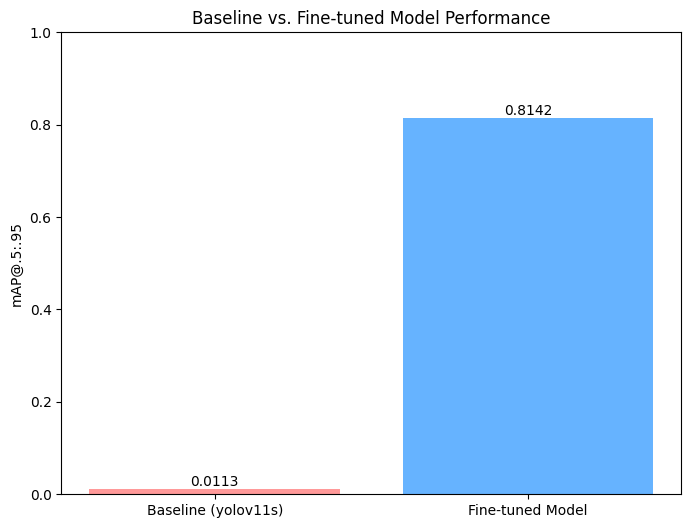

In [ ]:
"""
# 기본 yolov11s 모델과 훈련된 yolo 모델의 성능 비교
"""
print("--- 1, 기본 모델(Baseline) 성능 검증 ---")
try:
    # (1-1) 검증에 사용할 기본 모델을 로드
    baseline_model = YOLO('/content/drive/MyDrive/hackerton/safe/HardHatDetector/ptModel/yolo11s.pt')

    # (1-2) .val() 메소드를 호출하여 검증을 수행하고, 결과를 metrics 객체로 받습니다.
    baseline_metrics = baseline_model.val(
        data=CUSTOM_YAML_PATH,
        imgsz=640,
        name='baseline_validation' # 결과 저장 폴더 이름 지정
    )

    # (1-3) 주요 성능 지표를 저장합니다.
    baseline_map50_95 = baseline_metrics.box.map
    print(f"베이스라인 모델 mAP50-95: {baseline_map50_95 * 100:.2f}%")

except Exception as e:
    print(f"기본 모델 검증 중 오류 발생: {e}")
    baseline_map50_95 = 0.0 # 오류 발생 시 0으로 처리


print("\n--- 2. 훈련된 모델(Fine-tuned) 성능 검증 ---")
try:
    # (2-1) 가장 성능이 좋았던, 직접 훈련시킨 모델을 로드합니다.
    finetuned_model = YOLO(best_model_path)

    # (2-2) 동일한 검증 데이터셋으로 성능을 평가합니다.
    finetuned_metrics = finetuned_model.val(
        data=CUSTOM_YAML_PATH,
        imgsz=640,
        name='finetuned_validation'
    )

    # (2-3) 주요 성능 지표를 저장합니다.
    finetuned_map50_95 = finetuned_metrics.box.map
    print(f"훈련된 모델 mAP50-95: {finetuned_map50_95 * 100:.2f}%")

except Exception as e:
    print(f"훈련된 모델 검증 중 오류 발생: {e}")
    finetuned_map50_95 = 0.0


# --- 3. 성능 비교 시각화 ---
print("\n--- 3. 성능 비교 시각화 ---")

models = ['Baseline (yolov11s)', 'Fine-tuned Model']
maps = [baseline_map50_95, finetuned_map50_95]

plt.figure(figsize=(8, 6))
bars = plt.bar(models, maps, color=['#ff9999', '#66b3ff'])
plt.ylabel('mAP@.5:.95')
plt.title('Baseline vs. Fine-tuned Model Performance')
plt.ylim(0, 1.0)

# 막대 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.4f}', va='bottom', ha='center')

plt.show()


In [ ]:
# 모델 특징 확인
finetuned_model = YOLO(best_model_path)
print(type(finetuned_model.names), len(finetuned_model.names))

print(finetuned_model.names)

<class 'dict'> 2
{0: 'helmet', 1: 'no-helmet'}


-----
### **5단계: 훈련된 pt 모델을 tflite 파일로 변환하고, 성능을 비교합니다.  

In [10]:
"""
# 훈련된 모델을 TensorFlow Lite로 변환
# pytorch->onnx->tflite 순으로 onnx 포멧을 거쳐 변환됨
"""

# pytorch->onnx 변환
# --- 1. yolo 모델 경로 설정 ---
project_name = "/content/drive/MyDrive/hackerton/safe/HardHatDetector/yolo_results"
run_name = "helmet_detection_run_with_augmentation"

# 가장 성능이 좋았던 모델의 .pt 파일 경로
best_model_path = f"{project_name}/{run_name}/weights/best.pt"

try:
    # --- 2. 모델 로드 및 onnx 변환 ---
    # (2-1) 훈련된 .pt 모델 로드
    best_model = YOLO(best_model_path)
    print(f"모델 로드 완료: {best_model_path}")

    # (2-2) onnx로 내보내기
    tflite_path = best_model.export(
        format='tflite',   # tflite 포맷으로 지정
        int8=False,        # INT8(양자화) 대신 float32로 정확도 우선
        simplify=True,      # 그래프 최적화
        data=CUSTOM_YAML_PATH, # 데이터셋 경로
        imgsz=640          # 훈련 시 사용했던 이미지 크기 명시
    )

    print("\n✅ tflite 모델 변환 성공!")
    print(f"저장된 경로: {tflite_path}")

except Exception as e:
    print(f"\n❌ 모델 변환 중 오류 발생: {e}")

모델 로드 완료: /content/drive/MyDrive/hackerton/safe/HardHatDetector/yolo_results/helmet_detection_run_with_augmentation/weights/best.pt
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/hackerton/safe/HardHatDetector/yolo_results/helmet_detection_run_with_augmentation/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (18.3 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'ai-edge-litert>=1.2.0,<1.4.0'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 5.3s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


TensorFlow SavedModel: starting export with tensorflow 2.19.0...


100%|██████████| 1.11M/1.11M [00:00<00:00, 173MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 32.32file/s]


ONNX: starting export with onnx 1.17.0 opset 19...


ONNX: slimming with onnxslim 0.1.58...
ONNX: export success ✅ 3.4s, saved as '/content/drive/MyDrive/hackerton/safe/HardHatDetector/yolo_results/helmet_detection_run_with_augmentation/weights/best.onnx' (36.3 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.28.0...
Saved artifact at '/content/drive/MyDrive/hackerton/safe/HardHatDetector/yolo_results/helmet_detection_run_with_augmentation/weights/best_saved_model'. The following endpoints are available:

* Endpoint 'serving_default'
  inputs_0 (POSITIONAL_ONLY): TensorSpec(shape=(1, 640, 640, 3), dtype=tf.float32, name='images')
Output Type:
  TensorSpec(shape=(1, 6, 8400), dtype=tf.float32, name=None)
Captures:
  133937791918992: TensorSpec(shape=(4, 2), dtype=tf.int32, name=None)
  133937791918800: TensorSpec(shape=(3, 3, 3, 32), dtype=tf.float32, name=None)
  133937791919376: TensorSpec(shape=(32,), dtype=tf.float32, name=None)
  133937791922832: TensorSpec(shape=(4, 2), dtype=tf.int32, name=None)
  133937791918416: T

#### 위 방법으로 바로 변환이 실패하고, onnx파일만 생성되는 경우 아래 코드를 실행
onnx → TFLite 변환

In [ ]:
!pip install -U onnx2tf

# onnx -> tflite 변환
# 2. 경로 정의
input_onnx_path = "/content/drive/MyDrive/hackerton/safe/HardHatDetector/yolo_results/helmet_detection_run_with_augmentation/weights/best.onnx"
output_tf_path = "/content/drive/MyDrive/hackerton/safe/HardHatDetector/yolo_results/helmet_detection_run_with_augmentation/weights/best_saved_model/"

# 3. onnx2tf 변환 (배치 크기 고정, 채널 순서 유지)
!onnx2tf -i {input_onnx_path} -o {output_tf_path} -b 1 -kt "images"

### pt 모델과 tflite 모델 성능 비교

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
--- .pt 모델 성능 평가 ---
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 27.7±14.5 MB/s, size: 47.2 KB)


val: Scanning /content/drive/MyDrive/hackerton/safe/HardHatDetector/valid/labels.cache... 39 images, 2 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.22s/it]


                   all         39         69      0.953      0.826      0.922      0.814
                helmet         37         69      0.953      0.826      0.922      0.814
Speed: 6.5ms preprocess, 688.7ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/pt_validation

--- .tflite 모델 성능 평가 ---
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Loading /content/drive/MyDrive/hackerton/safe/HardHatDetector/yolo_results/helmet_detection_run_with_augmentation/weights/best_saved_model/best_float16.tflite for TensorFlow Lite inference...
Setting batch=1 input of shape (1, 3, 640, 640)
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 25.9±6.7 MB/s, size: 51.9 KB)


val: Scanning /content/drive/MyDrive/hackerton/safe/HardHatDetector/valid/labels.cache... 39 images, 2 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:19<00:00,  1.99it/s]


                   all         39         69      0.903      0.807      0.888      0.739
                helmet         37         69      0.903      0.807      0.888      0.739
Speed: 2.0ms preprocess, 485.9ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/tflite_validation


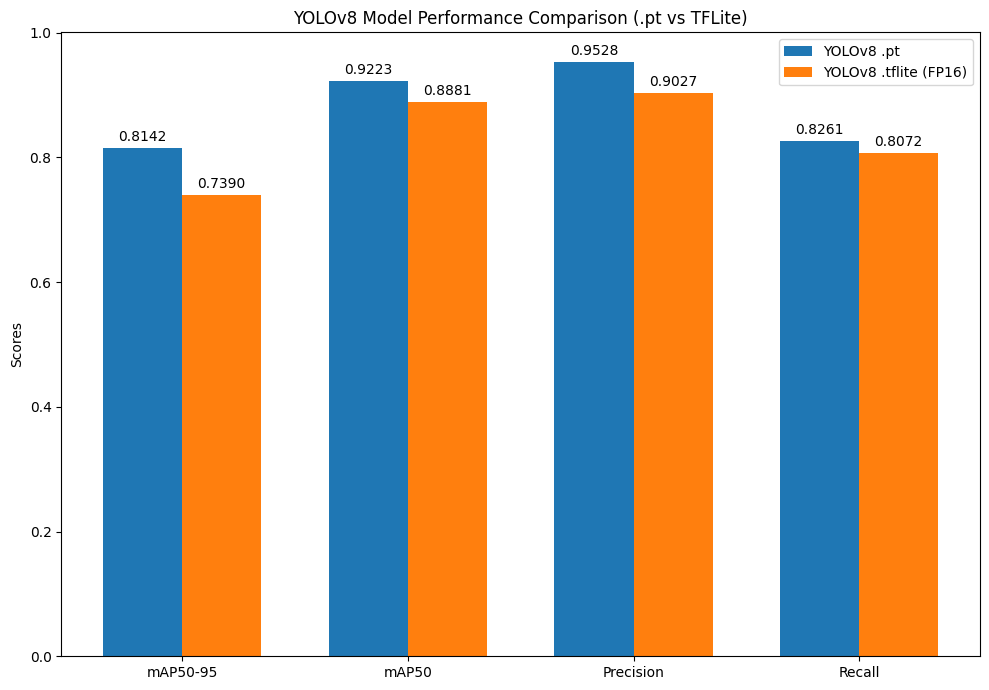

In [19]:
"""
# 훈련된 yolov11s pt 모델과 tflite 변환 모델 성능 비교
"""
# --- 1. 경로 및 모델 로드 ---
project_name = "/content/drive/MyDrive/hackerton/safe/HardHatDetector/yolo_results"
run_name = "helmet_detection_run_with_augmentation"
CUSTOM_YAML_PATH = '/content/drive/MyDrive/hackerton/safe/HardHatDetector/custom_data.yaml'

best_model_path = f"{project_name}/{run_name}/weights/best.pt"
tflite_model_path = f"{project_name}/{run_name}/weights/best_saved_model/best_float16.tflite"

# 모델 로드
best_model = YOLO(best_model_path)
tflite_model = YOLO(tflite_model_path) # YOLO 객체로 TFLite 모델 로드

# --- 2. 각 모델 성능 평가 ---
print("--- .pt 모델 성능 평가 ---")
metrics_pt = best_model.val(data=CUSTOM_YAML_PATH, imgsz=640, name='pt_validation')

print("\n--- .tflite 모델 성능 평가 ---")
metrics_tflite = tflite_model.val(data=CUSTOM_YAML_PATH, imgsz=640, name='tflite_validation')

# --- 3. 시각화를 위한 데이터 준비 ---
labels = ['mAP50-95', 'mAP50', 'Precision', 'Recall']

# .pt 모델의 성능 지표 추출
pt_scores = [
    metrics_pt.box.map,    # mAP50-95
    metrics_pt.box.map50,  # mAP50
    metrics_pt.box.p[0],   # Precision (전체 클래스 평균)
    metrics_pt.box.r[0]    # Recall (전체 클래스 평균)
]

# .tflite 모델의 성능 지표 추출
tflite_scores = [
    metrics_tflite.box.map,
    metrics_tflite.box.map50,
    metrics_tflite.box.p[0],
    metrics_tflite.box.r[0]
]

# --- 4. 시각화 ---
x = np.arange(len(labels))  # 라벨의 개수에 맞춰 x축 위치 생성
width = 0.35  # 막대그래프 너비

fig, ax = plt.subplots(figsize=(10, 7))
rects1 = ax.bar(x - width/2, pt_scores, width, label='YOLOv8 .pt')
rects2 = ax.bar(x + width/2, tflite_scores, width, label='YOLOv8 .tflite (FP16)')

# 레이블, 제목, 눈금 설정
ax.set_ylabel('Scores')
ax.set_title('YOLOv8 Model Performance Comparison (.pt vs TFLite)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# 막대 위에 값 표시
ax.bar_label(rects1, padding=3, fmt='%.4f')
ax.bar_label(rects2, padding=3, fmt='%.4f')

fig.tight_layout()
plt.show()